In [8]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append('../')
import matching_catalog

import matplotlib.pyplot as plt
import degrade_photometry
from astropy.table import Table
import numpy as np
sys.path.append('../target_selection/')
import lbg

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [55]:
data_path = '/global/cfs/cdirs/desi/users/cpayerne/data_WP221_Target_selection/'
cosmos_data = Table.read(data_path + 'COSMOS_clauds_hsc_allwise_r25.fits')

In [56]:
cosmos_data.colnames

['designation_allwise',
 'ra_allwise',
 'dec_allwise',
 'sigra_allwise',
 'sigdec_allwise',
 'sigradec_allwise',
 'w1mpro_allwise',
 'w1sigmpro_allwise',
 'w1snr_allwise',
 'w1rchi2_allwise',
 'w2mpro_allwise',
 'w2sigmpro_allwise',
 'w2snr_allwise',
 'w2rchi2_allwise',
 'w3mpro_allwise',
 'w3sigmpro_allwise',
 'w3snr_allwise',
 'w3rchi2_allwise',
 'w4mpro_allwise',
 'w4sigmpro_allwise',
 'w4snr_allwise',
 'w4rchi2_allwise',
 'nb_allwise',
 'na_allwise',
 'w1sat_allwise',
 'w2sat_allwise',
 'w3sat_allwise',
 'w4sat_allwise',
 'pmra_allwise',
 'sigpmra_allwise',
 'pmdec_allwise',
 'sigpmdec_allwise',
 'cc_flags_allwise',
 'ext_flg_allwise',
 'var_flg_allwise',
 'ph_qual_allwise',
 'moon_lev_allwise',
 'w1nm_allwise',
 'w1m_allwise',
 'w2nm_allwise',
 'w2m_allwise',
 'w3nm_allwise',
 'w3m_allwise',
 'w4nm_allwise',
 'w4m_allwise',
 'id_base_allwise',
 'ID_claudshsc',
 'RA_claudshsc',
 'DEC_claudshsc',
 'TRACT_claudshsc',
 'PATCH_claudshsc',
 'MASK_claudshsc',
 'FLAG_FIELD_claudshsc',
 'A

In [57]:
conv = dict()
conv['u'] = 'u_claudshsc'
conv['g'] = 'g_claudshsc'
conv['r'] = 'r_claudshsc'
conv['i'] = 'i_claudshsc'
conv['z'] = 'z_claudshsc'
conv['w1'] = 'w1mpro_allwise'
conv['w2'] = 'w2mpro_allwise'
conv['w3'] = 'w3mpro_allwise'
conv['w4'] = 'w4mpro_allwise'
conv['u_err'] = 'u_err_claudshsc'
conv['g_err'] = 'g_err_claudshsc'
conv['r_err'] = 'r_err_claudshsc'
conv['i_err'] = 'i_err_claudshsc'
conv['z_err'] = 'z_err_claudshsc'

(array([1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 1.000e+00, 2.600e+01,
        1.774e+03, 3.208e+03, 4.626e+03, 6.942e+03, 8.421e+03, 8.991e+03,
        9.180e+03, 6.016e+03, 1.578e+03, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00]),
 array([10.        , 11.03448276, 12.06896552, 13.10344828, 14.13793103,
        15.17241379, 16.20689655, 17.24137931, 18.27586207, 19.31034483,
        20.34482759, 21.37931034, 22.4137931 , 23.44827586, 24.48275862,
        25.51724138, 26.55172414, 27.5862069 , 28.62068966, 29.65517241,
        30.68965517, 31.72413793, 32.75862069, 33.79310345, 34.82758621,
        35.86206897, 36.89655172, 37.93103448, 38.96551724, 40.        ]),
 <BarContainer object of 29 artists>)

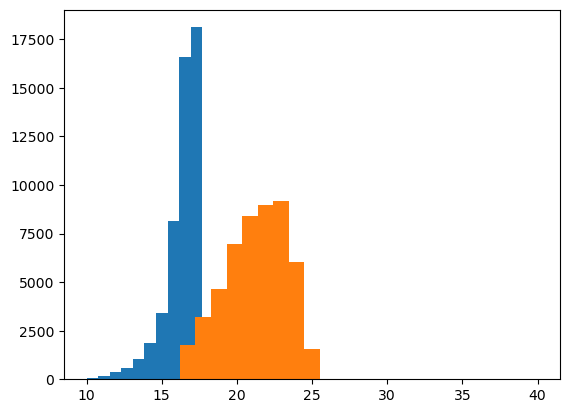

In [59]:
plt.hist(cosmos_data['w1mpro_allwise'], bins=np.linspace(10, 40, 40))
plt.hist(cosmos_data['r_claudshsc'], bins=np.linspace(10, 40, 30))

Text(0, 0.5, 'r-w1')

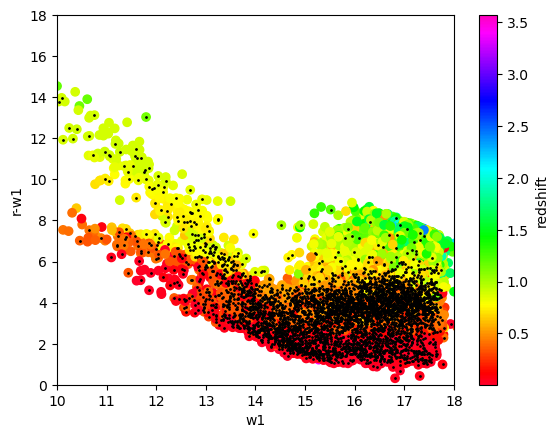

In [131]:
mask_z_ok = cosmos_data['ZPHOT_claudshsc'] > 0
plt.scatter(cosmos_data['w1mpro_allwise'][mask_z_ok], 
            cosmos_data['r_claudshsc'][mask_z_ok]-cosmos_data['w1mpro_allwise'][mask_z_ok],
            c = cosmos_data['ZPHOT_claudshsc'][mask_z_ok], cmap='gist_rainbow')
plt.colorbar(label='redshift')
mask_star = (cosmos_data['OBJ_TYPE_claudshsc']> 1.5)
plt.scatter(cosmos_data['w1mpro_allwise'][mask_z_ok*mask_star], 
            cosmos_data['r_claudshsc'][mask_z_ok*mask_star]-cosmos_data['w1mpro_allwise'][mask_z_ok*mask_star],
            c = 'k',s=1)
plt.xlim(10, 18)
plt.ylim(0,18)
plt.xlabel('w1')
plt.ylabel('r-w1')

(array([8.120e+03, 8.351e+03, 1.471e+03, 1.700e+02, 2.600e+01, 1.000e+00,
        3.000e+00, 0.000e+00, 0.000e+00]),
 array([0.        , 0.55555556, 1.11111111, 1.66666667, 2.22222222,
        2.77777778, 3.33333333, 3.88888889, 4.44444444, 5.        ]),
 <BarContainer object of 9 artists>)

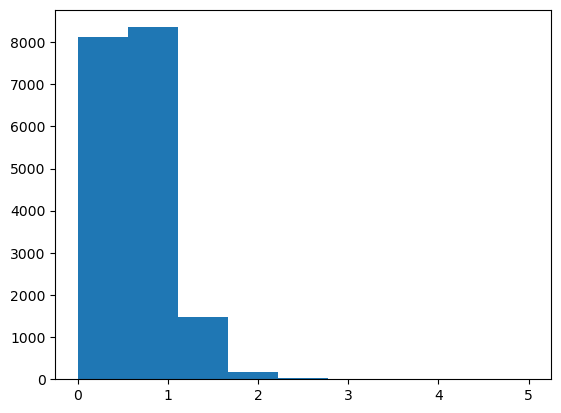

In [116]:
plt.hist(cosmos_data['ZPHOT_claudshsc'],bins=np.linspace(0, 5, 10))

In [29]:
mask_udrop = lbg.LBG_SELECTION(cosmos_data, conv, name='COSMOS_BXU_U_no_magr_cut') * lbg.refined_selection_fct(cosmos_data, conv)

(array([  3., 505., 329.,  36.,   5.,   0.,   1.,   0.,   0.]),
 array([0.        , 0.55555556, 1.11111111, 1.66666667, 2.22222222,
        2.77777778, 3.33333333, 3.88888889, 4.44444444, 5.        ]),
 [<matplotlib.patches.Polygon at 0x7fc846b508b0>])

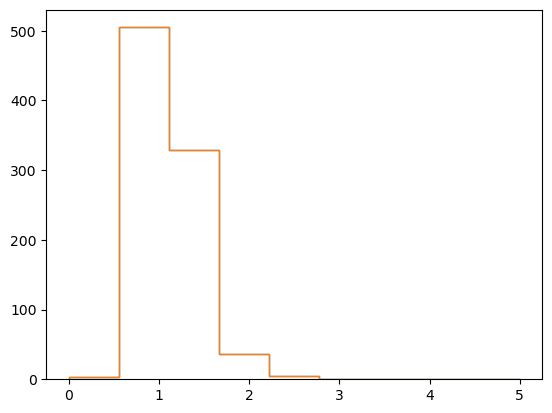

In [84]:
bins=np.linspace(0, 5, 10)
rmax = 24.2
rmin = 23.75
plt.hist(cosmos_data['ZPHOT_claudshsc'][(cosmos_data['r_claudshsc'] > rmin)*(cosmos_data['r_claudshsc'] < rmax)], bins=bins, histtype='step')
plt.hist(cosmos_data['ZPHOT_claudshsc'][(cosmos_data['r_claudshsc'] > rmin)*(cosmos_data['r_claudshsc'] < rmax)*(cosmos_data['r_claudshsc'] - cosmos_data['w1mpro_allwise'] > 5)], histtype='step', bins=bins)

In [60]:
cosmo_allwise = Table.read(data_path+"COSMOS_allWise_W1234.tbl", format="ascii.ipac")